# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [230]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
df = sinasc_raw

In [231]:
df.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [232]:
df_abaixo = df['munResLat'] < -10.5
df_acima = df['munResLat'] > -10.5

df.groupby(df_acima)[['KOTELCHUCK', 'PARIDADE']].sum()
df.groupby(df_acima)[['KOTELCHUCK', 'PARIDADE']].mean()
df.groupby(df_acima)[['KOTELCHUCK', 'PARIDADE']].min()
df.groupby(df_acima)[['KOTELCHUCK', 'PARIDADE']].max()
df.groupby(df_abaixo)[['KOTELCHUCK', 'PARIDADE']].median()
df.groupby(df_abaixo)[['KOTELCHUCK', 'PARIDADE']].std()
df.groupby(df_abaixo)[['KOTELCHUCK', 'PARIDADE']].var()

,KOTELCHUCK,PARIDADE
munResLat,,
False,5.580491,0.228651
True,2.721405,0.227040


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [233]:
munRes_acima = df['munResArea'] > 3000
munRes_abaixo = df['munResArea'] < 3000

df.groupby(munRes_acima)[['SEMAGESTAC', 'MESPRENAT']].sum()
df.groupby(munRes_acima)[['SEMAGESTAC', 'MESPRENAT']].mean()
df.groupby(munRes_acima)[['SEMAGESTAC', 'MESPRENAT']].min()
df.groupby(munRes_acima)[['SEMAGESTAC', 'MESPRENAT']].max()
df.groupby(df_abaixo)[['SEMAGESTAC', 'MESPRENAT']].median()
df.groupby(df_abaixo)[['SEMAGESTAC', 'MESPRENAT']].std()
df.groupby(df_abaixo)[['SEMAGESTAC', 'MESPRENAT']].var()

,SEMAGESTAC,MESPRENAT
munResLat,,
False,4.083516,577.968642
True,4.049895,454.767769


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [234]:
munRes_acima = df['munResAlt'] > 200
munRes_abaixo = df['munResAlt'] < 200

df.groupby(munRes_acima)[['TPDOCRESP', 'DTDECLARAC']].sum()
df.groupby(munRes_acima)[['TPDOCRESP', 'DTDECLARAC']].mean()
df.groupby(munRes_acima)[['TPDOCRESP', 'DTDECLARAC']].min()
df.groupby(munRes_acima)[['TPDOCRESP', 'DTDECLARAC']].max()
df.groupby(df_abaixo)[['TPDOCRESP', 'DTDECLARAC']].median()
df.groupby(df_abaixo)[['TPDOCRESP', 'DTDECLARAC']].std()
df.groupby(df_abaixo)[['TPDOCRESP', 'DTDECLARAC']].var()

,TPDOCRESP,DTDECLARAC
munResLat,,
False,0.953868,7.692879e+13
True,1.735749,7.597426e+13


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [279]:
df2 = df.copy()

In [280]:
mapping_imediatas = [
    'Porto Velho',
    'Ariquemes',
    'Jaru',
    'Ji-Paraná',
    'Cacoal',
    'Vilhena',
]

df2 = df2.loc[df2['munResNome'].isin(mapping_imediatas)]
df2 = df2.set_index('munResNome')
meanAgeByCity = df2.groupby(['munResNome','DTNASC'])[['IDADEMAE']].mean()

In [281]:
meanAgeByCity

IDADEMAE
munResNome DTNASC               
Ariquemes  2019-01-01  22.000000
           2019-01-02  26.500000
           2019-01-03  24.333333
           2019-01-04  24.666667
           2019-01-05  23.125000
...                          ...
Vilhena    2019-12-27  24.000000
           2019-12-28  17.666667
           2019-12-29  25.500000
           2019-12-30  26.600000
           2019-12-31  23.250000

[2118 rows x 1 columns]

<Figure size 720x1152 with 0 Axes>

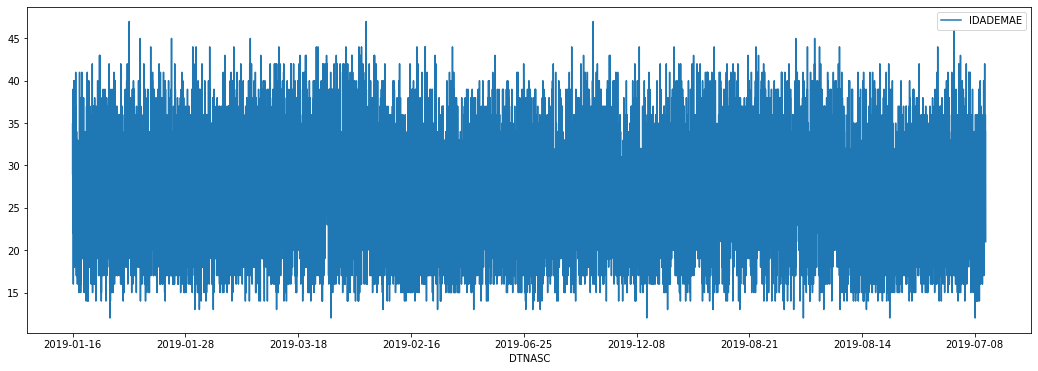

<Figure size 720x1152 with 0 Axes>

In [276]:
df2.plot(x='DTNASC', y='IDADEMAE', ,figsize=[18,6])
plt.figure(figsize=(10,16))

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [239]:
df3 = df.copy()

In [240]:
df3 = df3.set_index('munResNome')
mapping = {
    'Porto Velho' : 'IDH-M alto',
    'Vilhena' : 'IDH-M alto',
    'Cacoal': 'IDH-M alto',
    'Cerejeiras' : 'IDH-M médio',
    'Jaru' : 'IDH-M médio',
    'Colorado do Oeste' : 'IDH-M médio',
    'Seringueiras': 'IDH-M baixo',
    'Governador Jorge Teixeira': 'IDH-M baixo',
    "Machadinho d'Oeste": 'IDH-M baixo',
}

weight = pd.qcut(df3['PESO'], 2)

In [241]:
# Média geral pelos melhores rakeados em cada classificação de IDH Municipal
df3.groupby(mapping)[['QTDFILVIVO','QTDFILMORT', 'APGAR1','PESO']].mean()

,QTDFILVIVO,QTDFILMORT,APGAR1,PESO
munResNome,,,,
IDH-M alto,1.093078,0.291999,8.249140,3241.898693
IDH-M baixo,0.836364,0.214545,7.871429,3269.082143
IDH-M médio,0.915216,0.249621,8.094737,3250.869369


In [242]:
df3.groupby([mapping, weight])[['QTDFILVIVO','QTDFILMORT', 'APGAR1']].mean()

QTDFILVIVO  QTDFILMORT    APGAR1
munResNome  PESO                                               
IDH-M alto  (257.999, 3270.0]    1.005139    0.284759  8.194667
            (3270.0, 5985.0]     1.178434    0.299018  8.302728
IDH-M baixo (257.999, 3270.0]    0.716418    0.253731  7.826087
            (3270.0, 5985.0]     0.950355    0.177305  7.915493
IDH-M médio (257.999, 3270.0]    0.812689    0.271212  8.040480
            (3270.0, 5985.0]     1.018209    0.227964  8.149321

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
mapping = {
    'Ariquemes' : 'Desenvolvimento moderado',
    'Vilhena' : 'Desenvolvimento moderado',
    'Pimenta Bueno': 'Desenvolvimento moderado',
    "Espigão d'Oeste" : 'Desenvolvimento regular',
    'Seringueiras' : 'Desenvolvimento regular',
    "Alvorada d'Oeste" : 'Desenvolvimento regular',
}
weight = pd.qcut(df3['PESO'], 2)

In [ ]:
df3.groupby(mapping)[['QTDFILVIVO','QTDFILMORT', 'APGAR1']].mean()

In [244]:
df3.groupby([mapping, weight])[['QTDFILVIVO','QTDFILMORT', 'APGAR1']].mean()

QTDFILVIVO  QTDFILMORT    APGAR1
munResNome               PESO                                               
Desenvolvimento moderado (257.999, 3270.0]    0.872850    0.247120  8.079316
                         (3270.0, 5985.0]     0.982974    0.235058  8.116442
Desenvolvimento regular  (257.999, 3270.0]    0.753247    0.272727  7.649351
                         (3270.0, 5985.0]     0.988889    0.200000  7.835165

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [245]:
mapping = {
    'Porto Velho' : 'Acima de 1 Bilhão',
    'Ji-Paraná' : 'Acima de 1 Bilhão',
    'Vilhena': 'Acima de 1 Bilhão',
    'Guajará-Mirim' : 'Acima de 500 Milhões',
    'Ouro Preto do Oeste' : 'Acima de 500 Milhões',
    'Buritis' : 'Acima de 500 Milhões',
    'Alta Floresta do Oeste': 'Acima de 300 Milhões',
    'Presidente Médici': 'Acima de 300 Milhões',
    "Cujubim": 'Acima de 300 Milhões',
}
weight = pd.qcut(df3['PESO'], 2)

In [246]:
# Média geral pelos melhores rakeados em cada classificação de PIB
df3.groupby([mapping])[['QTDFILVIVO','QTDFILMORT', 'APGAR1','PESO']].mean()

,QTDFILVIVO,QTDFILMORT,APGAR1,PESO
munResNome,,,,
Acima de 1 Bilhão,1.085681,0.284817,8.216672,3243.016463
Acima de 300 Milhões,1.061508,0.235060,7.915521,3221.064833
Acima de 500 Milhões,1.276190,0.339564,8.335859,3253.663158


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Municipios com IDH mais alto tinham mais filhos vivos, mas não tinham a menor média de filhos mortos.
- Municípios com PIB de 300 milhões tiveram apgar1 menor em comparação aos maiores.